We'll be using the famous titanic data set from kaggle. 
We want to implement logistic regression in python for classification. 

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
train = pd.read_csv("data/titanic/train.csv")
test = pd.read_csv("data/titanic/test.csv")

Let's use seaborn to create a heatmap to see where we are missing data:

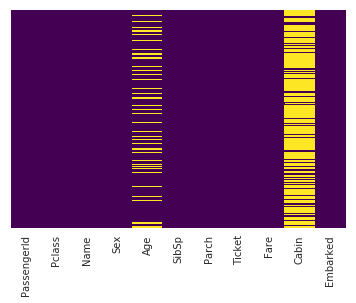

In [19]:
sns.heatmap( test.isnull(), yticklabels=False, cbar=False, cmap='viridis')

As we can see, about 20 percent of the age data is missing. This is not too bad, but the cabin column is missing so much data that we might drop it. 

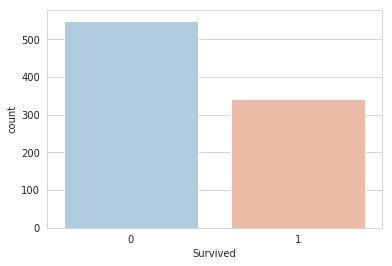

In [20]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,palette='RdBu_r')

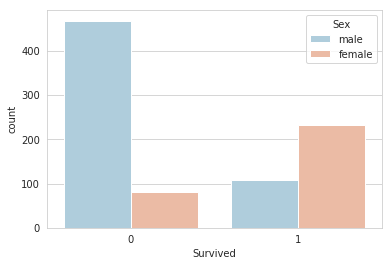

In [21]:
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

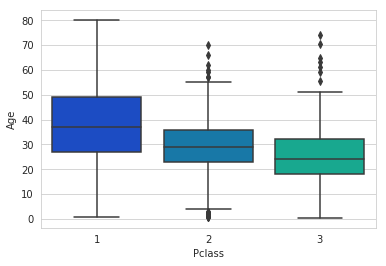

In [22]:
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

This tells us that wealthier passengers tend to be older. Because the passenger class is likely to be correlated with the survival rate, and we see the passenger class is stratified by age, we know that if we want to impute the missing age values, we need to select different values for each passenger class to impute. 

In order to do this, we'll define a function that imputes the correct age value based on the passenger class:

In [23]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            # average age in passenger class 1 is 37
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

Now we apply this imputation to the age column:

In [24]:
train['Age'] = train[['Age','Pclass']].apply(impute_age, axis=1)
test['Age'] = test[['Age','Pclass']].apply(impute_age, axis=1)

Now we can check the missing value heat map again

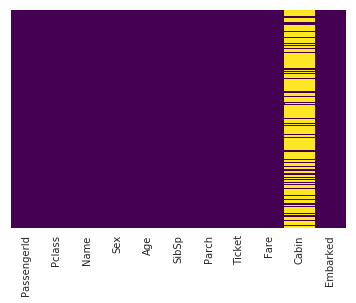

In [25]:
sns.heatmap( test.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Now we'll just drop the cabin column and the one row that has a NaN in the Embarked column.

In [26]:
train.drop('Cabin',axis=1,inplace=True)
test.drop('Cabin',axis=1,inplace=True)
train.dropna(inplace=True)

No we convert the categorical features to dummy variables using pandas.

In [27]:
sex = pd.get_dummies( train['Sex'], drop_first=True )
embark = pd.get_dummies( train['Embarked'], drop_first=True )
train.drop(['Sex','Embarked','Name','Ticket'],
          axis=1,inplace=True)
train = pd.concat([train,sex,embark],axis=1)
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


Now we shall build our logistic model

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( train.drop("Survived",axis=1),train["Survived"],test_size=0.3,random_state=42)

In [29]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

preds = logmodel.predict(X_test)

/home/joseph/miniconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Now we will evaluate the various classification metrics by using the `classification_report` sklearn provides.

In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.82      0.87      0.85       167
           1       0.76      0.69      0.72       100

   micro avg       0.80      0.80      0.80       267
   macro avg       0.79      0.78      0.78       267
weighted avg       0.80      0.80      0.80       267

